In [105]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [125]:
sentences = [
['one', 'two', 'three'],
['five', 'six', 'seven']
]

In [119]:
graph = nx.MultiGraph()

In [120]:
def get_new_word():
    sentence = sentences[random.randrange(0, len(sentences))]
    word = sentence[random.randrange(0, len(sentence))]
    ##print 'get new word returns : ', word
    return word

class WordObject():
    def __init__(self, word):
        self.word = word

def add_object_to_graph(graph, new_object):
    #add new word
    graph.add_node(new_object, word=new_object.word)
    return graph
    
def add_collision(graph, new_object):
    #get a random existing node for new word to 'collide' with
    collides_with_index = random.randrange(0, graph.number_of_nodes(), 1)
    collides_with = graph.nodes()[collides_with_index]
    #add edge between the two
    ##print 'add edge ', new_object.word, collides_with.word
    graph.add_edge(new_object, collides_with)
    return graph


In [121]:
#randomly add some nodes and edges to the graph
for i in range(0, 50):
    word = get_new_word()
    new_object = WordObject(word)
    graph = add_object_to_graph(graph, new_object)
    word = get_new_word()
    new_object = WordObject(word)
    graph = add_object_to_graph(graph, new_object)
    graph = add_collision(graph, new_object)
    graph = add_collision(graph, new_object)

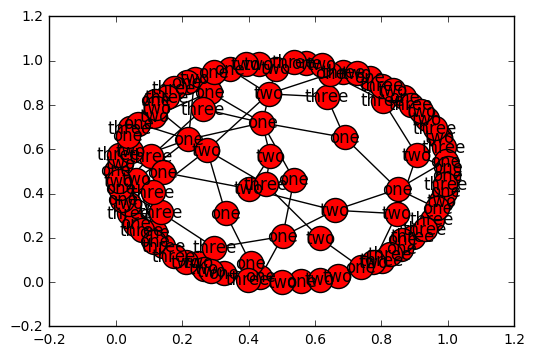

In [122]:
labels = nx.get_node_attributes(graph, 'word')

nx.draw_networkx(graph, labels=labels)
plt.show()

In [123]:
 """
look_through 
INPUT: a list of nodes (could be empty), i (position in sentence to check them against), sentence, list for matches 
to be appended to
OUTPUT: None if input list is empty, list with one node if at last word, list with current node appended (matching nodes list)

"""
def look_through_neighbors(neighbors, i, sentence):
    i += 1  
    
    if len(neighbors) == 0: #input list empty (no matching neighbors for previous node)
        return 0
    
    elif len(neighbors) > 0 and i == len(sentence): #nodes in input list (representing last word) -> send one back
        return [neighbors[0]]
    
    elif len(neighbors) > 0: #input list not empty, there are matching neighbors
        # for each neighbor, get its neighbors which match the next word
        # call look through on those 
        for neighbor in neighbors:
            matching_neighbors = [node for node in graph.neighbors(neighbor) if node.word == sentence[i]] 
            match = look_through_neighbors(matching_neighbors, i, sentence)
            if type(match) == list: 
                match.append(neighbor)
                return match
            
        


In [124]:
for sentence in sentences:
    i = 0
    start_nodes = [node for node in graph.nodes() if node.word == sentence[i]] 
    match = look_through_neighbors(start_nodes, i, sentence)
    if match: 
        print 'the nodes ', match, ' make a sentence of the following words:'
        for item in match:
            print item.word
            


the nodes  [<__main__.WordObject instance at 0x000000000A8147C8>, <__main__.WordObject instance at 0x000000000A814D08>, <__main__.WordObject instance at 0x000000000A814348>]  make a sentence of the following words:
three
two
one
